In [2]:
import sys
!{sys.executable} -m pip install camb

In [3]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at C:\Users\lenovo\anaconda3\lib\site-packages\camb


In [4]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
#tau = np.random.uniform(0.6,1.0)
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, theta)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [5]:
results = camb.get_results(pars)
print(results)

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2650
   max_l_tensor = 600
   max_eta_k = 6625.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.022
   omch2 = 0.122
   omk = 0.0
   omnuh2 = 0.0006451383989381787
   H0 = 67.5
   TCMB = 2.7255
   YHe = 0.24524332588411976
   num_nu_massless = 2.030666666666667
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0153333333333332]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   I

(0.20412429135562996, 0.03674237244401339)
0.9458907132005466
CosmoMC theta_MC parameter: 0.007412947963379576
Note: redshifts have been re-sorted (earliest first)
[0.06152083 0.0639739  0.06662455 0.06949641 0.07261674 0.07601707
 0.07973384 0.0838093  0.08829226 0.09323902 0.09871405 0.10479024
 0.11154842 0.11907509 0.12745746 0.13677374 0.14707671 0.15836821
 0.17056415 0.18345355]
(0.5021307788001835, 0.09038354018403304)
0.7200670726347469
CosmoMC theta_MC parameter: 0.008209996526210201
Note: redshifts have been re-sorted (earliest first)
[0.06473836 0.06737862 0.07024203 0.07335782 0.07676047 0.08049095
 0.08459821 0.08914123 0.09419161 0.09983698 0.10618547 0.1133717
 0.12156465 0.13097804 0.14188378 0.15462851 0.16965199 0.18750141
 0.20882544 0.23430785]
(0.7613195315932446, 0.13703751568678402)
0.9215228381086567
CosmoMC theta_MC parameter: 0.007391212928520108
Note: redshifts have been re-sorted (earliest first)
[0.09466086 0.09854479 0.10276084 0.10735342 0.11237523 0.117

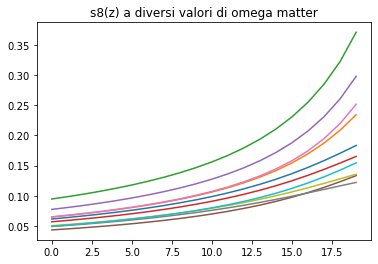

  (10, 20)
  [[1.         0.99999777 0.99998965 0.99997283 0.99994325 0.99989508
  0.99981988 0.99970546 0.99953428 0.99928111 0.99890996 0.9983701
  0.99759138 0.99647975 0.99491479 0.99275343 0.98984551 0.98606878
  0.98138725 0.9759262 ]
 [0.99999777 1.         0.99999703 0.99998617 0.99996354 0.99992346
  0.99985775 0.9997545  0.99959649 0.99935889 0.99900616 0.99848806
  0.99773498 0.99665329 0.99512292 0.9930007  0.99013587 0.9864046
  0.98176812 0.97634757]
 [0.99998965 0.99999703 1.         0.99999602 0.99998138 0.99995064
  0.99989587 0.9998055  0.99966268 0.99944305 0.99911158 0.99861861
  0.99789512 0.99684803 0.99535762 0.99328069 0.99046573 0.98678713
  0.98220296 0.97682956]
 [0.99997283 0.99998617 0.99999602 1.         0.99999462 0.99997469
  0.9999326  0.99985715 0.99973194 0.99953313 0.9992263  0.99876247
  0.99807331 0.99706638 0.99562236 0.99359805 0.9908411  0.98722385
  0.9827007  0.97738249]
 [0.99994325 0.99996354 0.99998138 0.99999462 1.         0.99999265
  0.9

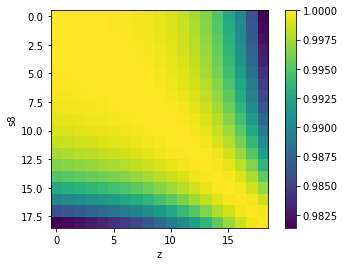

In [17]:
matrice_sigma8 = []

#chiama camb e calcola s8
pars0 = camb.CAMBparams()
def var_da_somma(somma):
    dm = somma/1.18
    bm=dm*0.18
    return dm,bm

for i in range(10):   
    somma = np.random.uniform(0.1,1.0)
    print(var_da_somma(somma))
    
    bm, dm =var_da_somma(somma)      
    h = np.random.uniform(0.4,1.0)  
    print(h)
    #H0=67.5
    H0 = h*100
    ns = np.random.uniform(0.6,1.0)
    tau = np.random.uniform(0.6,1.0)
    #cosmomc_theta = np.random.uniform(0.6,1.0)
    #z = np.linspace(0,4,100)
   
    pars0.set_cosmology(H0=H0, ombh2=bm*h**2, omch2=dm*h**2, tau=tau)
    pars0.InitPower.set_params(ns=ns)
#Note non-linear corrections couples to smaller scales than you want
    redshifts= np.linspace(0,3,20)
    DA = results.angular_diameter_distance(redshifts)
    print('CosmoMC theta_MC parameter: %s'%results.cosmomc_theta())
    pars0.set_matter_power(redshifts, kmax=2.0)

#Linear spectra
    pars0.NonLinear = model.NonLinear_none
    results = camb.get_results(pars0)
#kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
    s80 = np.array(results.get_sigma8())
    print(results.get_sigma8())
    matrice_sigma8.append(s80)
matrice_sigma8=np.array(matrice_sigma8) 
plt.plot(matrice_sigma8.T)
plt.title('s8(z) a diversi valori di omega matter')
plt.show()
#differenze relative o rispetto a media
#al posto di H0 cambio densità materia tenendo cost rapporto con  CDM e considero H0 squared
plt.xlabel('z');
plt.ylabel('s8');
#plt.legend(['H0 standard','H0+10%', 'H0-10%'], loc='upper left');

#salvo i risultati
#risultati =[]
#risultati.append(results.get_sigma8())
#print(risultati)
sigma8_corr=np.corrcoef(matrice_sigma8.T)
print(" ", np.shape(matrice_sigma8))
print(" ", sigma8_corr)
#import append
#results.append(s80)
#results.append(s80)
#converto results in array
#arr=[results]
#x=np.arr=[risultati]


#cov e corr su tutto
from matplotlib.colors import LogNorm
dx, dy= 0.015, 0.05
y,x = np.mgrid[slice(0.2,1.0 + dy, dy),
               slice(0.2,1.0 + dx, dx)]
z = (sigma8_corr)
z=z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()
#c = plt.imshow(z, cmap ='Greens', vmin=z_min, vmax=z_max,
 #               extent =[x.min(), x.max(), y.min(), y.max()], 
  #                 interpolation = 'nearest' , origin ='lower')

c=plt.imshow(z)
plt.colorbar(c)
plt.show()
#print(risultati)
